In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

def ConvertToMatrix(data, step) :
    X, Y = [], []
    
    for i in range(len(data) - step) :
        d = i + step
        X.append(data[i:d, ])
        Y.append(data[d, ])
    
    return np.array(X), np.array(Y)

In [185]:
step = 4
N = 1000
Tp = 800

t = np.arange(0, N)
x = np.sin(0.02 * t) + 2 * np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0.605445
1,1.912113
2,1.108631
3,0.991012
4,1.098915


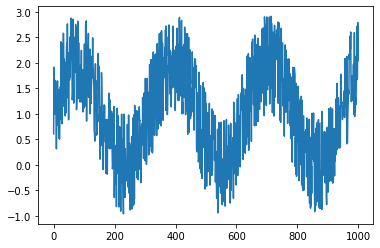

In [186]:
plt.plot(df)
plt.show()

In [187]:
values = df.values
train, test = values[0:Tp, :], values[Tp:N, :]

test = np.append(test, np.repeat(test[-1], step))
train = np.append(train, np.repeat(train[-1], step))

train_x, train_y = ConvertToMatrix(train, step)
test_x, test_y = ConvertToMatrix(test, step)

train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], -1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], -1))           

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_30 (SimpleRNN)    (None, 50)                2600      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
25/25 - 1s - loss: 0.8157 - accuracy: 0.0000e+00
Epoch 2/200
25/25 - 0s - loss: 0.4307 - accuracy: 0.0000e+00
Epoch 3/200
25/25 - 0s - loss: 0.4142 - accuracy: 0.0000e+00
Epoch 4/200
25/25 - 0s - loss: 0.4131 - accuracy: 0.0000e+00
Epoch 5/200
25/25 - 0s - loss: 0.4284 - accuracy: 0.0000e+00
Epoch 6/200
25/25 - 0s - loss: 0.4153 - accuracy: 0.0000e+00
Epoch 7/200
25/25 - 0s - loss: 0.4104 - accuracy: 0.0000e+00
Epoch 8/200
25/25 - 0s - loss: 0.4074 - accuracy: 0.0000e+00
Epoch 9/200
25/25 - 0s - 

<function matplotlib.pyplot.show(close=None, block=None)>

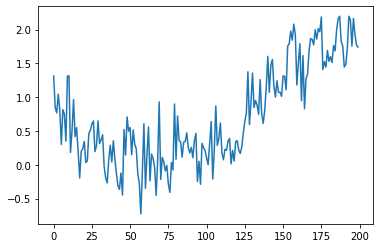

In [188]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape= (4, 1)))
model.add(Dense(1))
model.summary()
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model.fit(train_x, train_y, epochs=200, verbose=2)

result = model.predict(test_x)

plt.plot(result)
plt.show